In [49]:
import rasterio
import pandas as pd
import numpy as np
import cv2
from rasterio.plot import reshape_as_image
from rasterio.plot import show
import matplotlib.pyplot as plt

%matplotlib inline

In [50]:
#Path to 3 bands of sentinel data

In [51]:
safe_dir_1 = './test/S2A_MSIL2A_20231121T091301_N0509_R050_T35UQS_20231121T133756.SAFE/GRANULE/L2A_T35UQS_A043948_20231121T091328/IMG_DATA/R10m/'
red_band_path_1 = f'{safe_dir_1}T35UQS_20231121T091301_B04_10m.jp2'
green_band_path_1 = f'{safe_dir_1}T35UQS_20231121T091301_B03_10m.jp2'
blue_band_path_1 = f'{safe_dir_1}T35UQS_20231121T091301_B02_10m.jp2'

In [52]:
safe_dir_2 = './test/S2A_MSIL2A_20231121T091301_N0509_R050_T36UUB_20231121T133756.SAFE/GRANULE/L2A_T36UUB_A043948_20231121T091328/IMG_DATA/R10m/'
red_band_path_2 = f'{safe_dir_2}T36UUB_20231121T091301_B04_10m.jp2'
green_band_path_2 = f'{safe_dir_2}T36UUB_20231121T091301_B03_10m.jp2'
blue_band_path_2 = f'{safe_dir_2}T36UUB_20231121T091301_B02_10m.jp2'

In [53]:
#Transform sentinel data in 3 band RGB picture

In [55]:
def create_tiff(red_band_path, green_band_path, blue_band_path):
    file_name = red_band_path.split('/')[-1].split('.')[-2] + '.tiff'

    with rasterio.open(red_band_path) as red_read:
        red = red_read.read(1)
    with rasterio.open(green_band_path) as green_read:
        green = green_read.read(1)
    with rasterio.open(blue_band_path) as blue_read:
        blue = blue_read.read(1)

    with rasterio.open(file_name, 'w', driver='Gtiff',
                       width=red_read.width * 0.2,
                       height=red_read.height * 0.2,
                       count=3,
                       crs=red_read.crs,
                       transform=red_read.transform,
                       dtype=red_read.dtypes[0]) as rgb:
        rgb.write(blue, 3)
        rgb.write(green, 2)
        rgb.write(red, 1)
    return file_name

In [56]:
# 2 pictures for our algorithm

In [57]:
first = create_tiff(red_band_path_1, green_band_path_1, blue_band_path_1)

In [58]:
second = create_tiff(red_band_path_2, green_band_path_2, blue_band_path_2)

In [59]:
#My fail..i don't find a solution..extracted pictures in not True colors =(

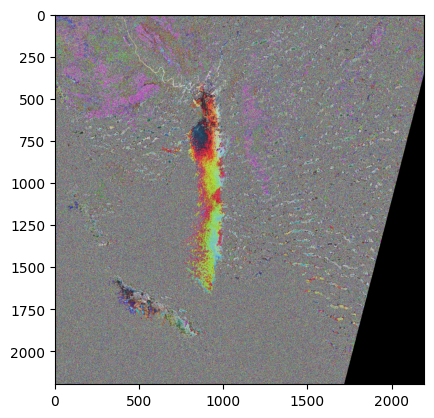

In [60]:
with rasterio.open(first, 'r') as data:
    picture = data.read()
    picture = reshape_as_image(picture)
    plt.imshow(picture.astype(np.uint8))

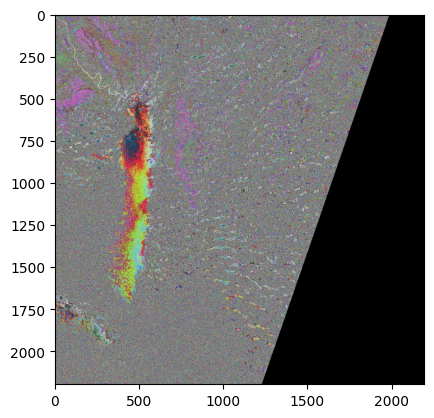

In [61]:
with rasterio.open(second, 'r') as data:
    picture = data.read()
    picture = reshape_as_image(picture)
    plt.imshow(picture.astype(np.uint8))